# Predicting Diabetes Using Logistic Regression

We will aim to predict whether a person has diabetes or not, based on information like blood pressure, body mass index (BMI), age, etc.

The data was collected and made available by "National Institute of Diabetes and Digestive and Kidney Diseases" as part of the Pima Indians Diabetes Database. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients belong to the Pima Indian heritage (subgroup of Native Americans), and are females of ages 21 and above.

The 'label' column indicates whether a patient has diabetes, and we will be predicting this.

## Introduction To The Dataset

In [1]:
#import pandas
import pandas as pd

col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

# load dataset
pima = pd.read_csv(r"C:\projectdatasets\diabetes.csv", header=None, names=col_names)

In [5]:
# show the first five rows
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [2]:
# remove first row
pima = pima.drop([0])

In [12]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


## Selecting Features

Divide the columns into two types of variables; dependent (or target predictor variable) and independent variable (or feature variables)

In [3]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']

# select the feature columns and set as 'X'
X = pima[feature_cols]
X.head()

,pregnant,insulin,bmi,age,glucose,bp,pedigree
1,6,0,33.6,50,148,72,0.627
2,1,0,26.6,31,85,66,0.351
3,8,0,23.3,32,183,64,0.672
4,1,94,28.1,21,89,66,0.167
5,0,168,43.1,33,137,40,2.288


In [5]:
# select the target variable column (label) and set as 'Y'
Y = pima.label
Y.head()

1    1
2    0
3    1
4    0
5    1
Name: label, dtype: object


## Splitting Data

To understand model performance, we need to divide the data into a training set and test set. 

We will split the dataset using the function 'train_test_split()'. We will pass in 3 parameters; features, target, and test_set size. We will aso use random_state to select records randomly.

In [6]:
# split X and Y into training and testing sets using 'train_test_split' function
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [25]:
# show the new dataset called 'X_Train' which represents 75% of the dataset (feature columns)
X_train

,pregnant,insulin,bmi,age,glucose,bp,pedigree
55,7,342,34.7,42,150,66,0.718
31,5,0,36,60,109,75,0.546
425,8,210,42.9,36,151,78,0.516
683,0,105,44.6,22,95,64,0.366
101,1,0,39,33,163,72,1.222
680,2,265,24.2,23,101,58,0.614
632,0,90,34.5,24,102,78,0.238
725,1,0,32.8,45,111,94,0.265
238,0,0,44.1,23,179,90,0.686
666,1,132,34.8,24,112,80,0.217


In [27]:
# show the new dataset called 'X_Test' which represents 25% of the dataset (feature columns)
X_test

,pregnant,insulin,bmi,age,glucose,bp,pedigree
662,1,0,42.9,22,199,76,1.394
123,2,100,33.6,23,107,74,0.404
114,4,0,34,25,76,62,0.391
15,5,175,25.8,51,166,72,0.587
530,0,0,24.6,31,111,65,0.66
104,1,40,26.6,24,81,72,0.283
339,9,171,34.2,33,152,78,0.893
589,3,156,33.3,52,176,86,1.154
396,2,275,27.7,25,127,58,1.6
205,6,190,37.7,55,103,72,0.324


In [28]:
# show the new dataset called 'Y_Test' which represents 75% of the dataset (target variable)
Y_train

763    0
128    0
565    0
376    1
664    1
145    0
269    0
22     0
610    0
512    0
36     0
474    0
256    1
535    0
78     0
567    0
313    1
466    0
110    1
554    0
300    0
102    0
316    0
93     0
244    1
398    1
295    0
505    0
401    1
368    0
      ..
449    1
432    0
710    1
116    1
73     1
538    0
678    0
754    1
175    0
88     0
552    0
487    0
706    0
315    1
397    0
601    0
473    0
71     1
600    0
755    1
278    0
724    0
10     1
360    1
708    0
764    0
193    1
630    0
560    0
685    0
Name: label, Length: 576, dtype: object

In [29]:
# show the new dataset called 'Y_Test' which represents 25% of the dataset (target variable)
# we hope our model will predict the same labels in this dataset
Y_test

662    1
123    0
114    0
15     1
530    0
104    0
339    1
589    1
396    0
205    0
32     1
547    1
279    0
594    0
738    0
203    0
176    1
56     0
480    0
366    0
418    1
578    1
173    0
353    0
28     0
606    0
240    0
745    0
80     0
497    0
      ..
98     0
531    0
328    0
620    1
519    0
633    0
525    0
537    0
598    0
463    0
18     1
740    1
264    0
242    0
345    0
303    0
705    0
241    0
171    1
692    1
491    0
46     1
751    1
63     0
79     1
367    1
302    1
383    0
141    0
464    0
Name: label, Length: 192, dtype: object

The dataset is broken into two parts in a ratio of 75:25. So 75% data will be used for model training and 25% for model testing.

## Model Development and Prediction

We will import the Logistic Regression module and create a Logistic Regression classifier object using LogisticRegression() function.

Then, we will fit the model on the training set using fit() and perform predictions on the test set using predict().

In [30]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using default parameters)
logreg = LogisticRegression()

# fit the model with training data
logreg.fit(X_train,Y_train)

# run prediction by feeding the feature (indepedent variable) columns in the test data set - 
# this will create the predictions for the target (dependent) variable
y_pred=logreg.predict(X_test)

C:\Users\Chris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [33]:
# show the predicted labels
print(y_pred)

['1' '0' '0' '1' '0' '0' '1' '1' '0' '0' '1' '1' '0' '0' '0' '0' '1' '0'
 '0' '0' '1' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '0' '1'
 '0' '0' '0' '1' '0' '0' '0' '1' '1' '0' '0' '0' '0' '0' '0' '0' '1' '0'
 '0' '0' '0' '0' '0' '0' '1' '0' '0' '1' '1' '1' '1' '0' '0' '0' '0' '1'
 '0' '1' '1' '0' '0' '1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0'
 '0' '0' '0' '0' '1' '0' '0' '0' '1' '0' '0' '0' '0' '0' '1' '0' '0' '0'
 '0' '1' '0' '0' '1' '0' '1' '1' '0' '1' '0' '1' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '1' '0' '0' '1' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '1' '0' '1' '0' '1' '1' '1' '1'
 '0' '0' '1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '1' '0' '1' '0' '0' '1' '0' '0' '0' '0' '0']


## Model Evaluation using Confusion Matrix

A confusion matrix is a table to evaluate the performance of a classification model. We can also visualise the performance of an algorithm. The number of correct and incorrect predictions are summed up class-wise.

In [34]:
# import the metrics class
from sklearn import metrics

# create a confusion matrix and compare the actual labels (Y_test) to the predictions (Y_pred)
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred) 

In [35]:
# view the confusion matrix
cnf_matrix

array([[119,  11],
       [ 26,  36]], dtype=int64)

The confusion matrix is an array object. The dimension of the matrix is 2 X 2 because this model is a binary classification e.g. two classes 0 and 1. 

Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions. 119 and 36 are actual predictions (which represent 80% of correct predictions), and 26 and 11 are incorrect predictions.

The total number of values add up to 192 - the number of predicted labels

## Visualising Confusion Matrix

We will visualise the confusion matrix using a heatmap (with matplotlib and seaborn)

In [36]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5,257.44,'Predicted label')

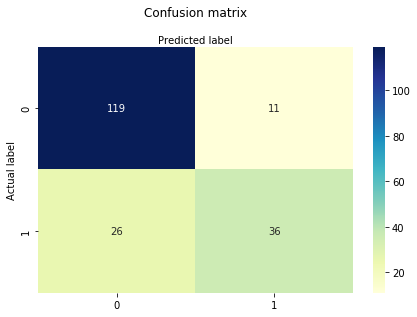

In [44]:
# name of classes
class_names=[0,1] 

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap of the confusion matrix
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Confusion Matrix Evaluation Metrics

We will evaluate the model using model evaluation metrics; accuracy, precision, and recall.

In [75]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred, average='macro'))
print("Recall:",metrics.recall_score(Y_test, Y_pred, average='macro'))

Accuracy: 0.8072916666666666
Precision: 0.7933235509904621
Recall: 0.748014888337469



- Accuracy - we have a classification rate of 80%, which is considered a good accuracy

- Precision - how precise i.e. how often it is correct. When the Logistic Regression model predicted patients are going to suffer from diabetes, it's correct 79% of the time

- Recall - patients who have diabetes in the test set and model can identify it 74% of the time